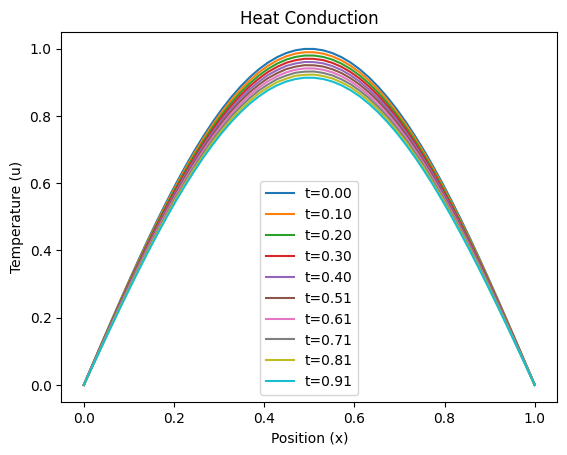

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

# Define the Fourier ODE for heat conduction
def heat_conduction(t, u, alpha, L):
    du_dx2 = np.zeros_like(u)
    du_dx2[1:-1] = (u[:-2] - 2*u[1:-1] + u[2:]) / (L / (len(u) - 1))**2
    return alpha * du_dx2

# Parameters
alpha = 0.01  # Thermal diffusivity
L = 1.0       # Length of the rod
nx = 50       # Number of spatial points
x = np.linspace(0, L, nx)
u0 = np.sin(np.pi * x)  # Initial temperature distribution

# Time span
t_span = (0, 1)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the ODE
sol = solve_ivp(heat_conduction, t_span, u0, t_eval=t_eval, args=(alpha, L), method='RK45')

# Plot the results
for i in range(0, len(sol.t), 10):
    plt.plot(x, sol.y[:, i], label=f't={sol.t[i]:.2f}')
plt.xlabel('Position (x)')
plt.ylabel('Temperature (u)')
plt.title('Heat Conduction')
plt.legend()
plt.show()